1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1.161274809
1.308986074
1.099614326
1.14153328
1.091700095
1.31013832
1.315076905
1.329159101
1.294815677
1.315653217
1.185717845
1.00668373
1.250929555
1.099915486
1.207942744
1.104731474
1.494567785
1.072693569
1.207673945
1.142609235
1.466768421
1.437949679
1.514382146
1.283692392
1.509595651
1.230712826
1.009831201
1.20201772
1.081892471
1.268508465
1.012203919
1.090236429
1.033807544
1.055162549
1.043835576
1.02708593
1.041254523
1.098631253
1.099535309
1.045333561
1.008141428
1.003453528
1.056774722
1.045862188
1.047237033
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.16127481 1.30898607 1.09961433 1.14153328 1.09170009 1.31013832
  1.3150769  1.3291591  1.29481568 1.31565322 1.18571785 1.00668373
  1.25092955 1.09991549 1.20794274]
 [1.10473147 1.49456779 1.07269357 1.20767395 1.14260923 1.46676842
  1.43794968 1.51438215 1.28369239 1.50

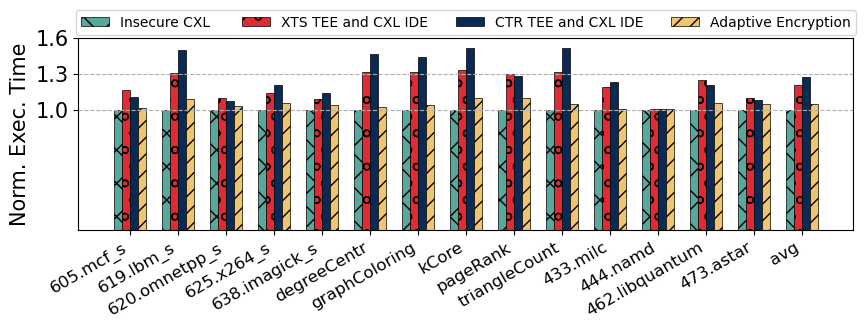

In [2]:
import numpy as np    
import matplotlib.pyplot as plt    
import openpyxl

#bar patterns
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

N=15
x=np.arange(N) 
xclicks=[
    '605.mcf_s','619.lbm_s','620.omnetpp_s','625.x264_s','638.imagick_s',
    'degreeCentr','graphColoring','kCore','pageRank','triangleCount',
    '433.milc','444.namd','462.libquantum','473.astar','avg'
]
xlabels=''
ylabels='Norm. Exec. Time'
wb = openpyxl.load_workbook(filename="bench.xlsx")
ws = wb['Sheet1']

b1=np.array([])

for col in ws.iter_cols(min_row=2,min_col=2,values_only=True):
    for value in col:
        # 获取单元格数据
        b1=np.append(b1,value)     
        print(value)            
b1=b1.reshape(4, 15)
print(b1)


allfigsize=(10,2.5)     
width=0.17
plt.figure(figsize=allfigsize)

print(b1[0])
# plt.bar(x - width*2.5, b1[0], width, label='Insecure Local', color='#cecece', hatch=".", edgecolor='black', linewidth=0.5, align='center')
# plt.bar(x - width*1.5, b1[2], width, label='XTS TEE Local', color='#a559aa', hatch="-", edgecolor='black', linewidth=0.5, align='center') 
plt.bar(x - width*1.5, b1[0], width, label='Insecure CXL ', color='#59a89c', hatch="x", edgecolor='black', linewidth=0.5, align='center')
plt.bar(x - width*0.5, b1[1], width, label='XTS TEE and CXL IDE', color='#e02b35', hatch="o",edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*0.5, b1[2], width, label='CTR TEE and CXL IDE', color='#082a54', edgecolor='black', linewidth=0.5, align='center')
plt.bar(x + width*1.5, b1[3], width, label='Adaptive Encryption',color='#f0c571',  hatch="//" ,edgecolor='black', linewidth=0.5, align='center')

plt.grid(axis='y',linestyle='--')
plt.xticks(x,xclicks, fontsize=12, rotation=30,ha='right', va='top') 
#plt.ylim(0,180000)
plt.yticks([1.0,1.3,1.6],fontsize=15)
#plt.xlabel(xlabels,fontsize=15)
plt.ylabel(ylabels,fontsize=15)    
plt.legend(loc='upper center', ncol=4, bbox_to_anchor=(0.50, 1.18), fontsize=10)    
plt.savefig('bench.pdf',bbox_inches = 'tight')    
plt.show()